In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace
import pandas as pd
import dlib
import warnings
import os
from IPython.display import Markdown as md
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

#### Definir função para apresentar múltiplas imagens, ou apenas uma

In [2]:
def show_multiple_images(pixels_array, rows, imgs_per_row, title):
    f, ax = plt.subplots(rows, imgs_per_row, figsize=(12,4))
    
    for idx, img in enumerate(pixels_array):
        ax[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    f.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

def show_image(pixels, title=''):
    f, ax = plt.subplots(1, 1, figsize=(12,4))
    plt.imshow(cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB))
    f.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

#### Identificar faces e carregar um método pré-treinado que vai pegar os principais pontos faciais do indivíduo, no caso, 68 pontos

In [3]:
frontal_face_detector = dlib.get_frontal_face_detector()
frontal_face_predictor = dlib.shape_predictor('./utils/shape_predictor_68_face_landmarks.dat')

#### Utilizando a primeira imagem como comparação, atravessaremos o banco de dados com imagens de famosos e utilizaremos a imagem que possui a maior ou menor distância em comparação com a imagem de origem, dependendo do parâmetro passado para função

#### Esta etapa será feita com a biblioteca DeepFace, uma biblioteca de estado da arte para reconhecimento facial e Deep Learning desenvolvido pelo facebook, mesclando modelos como: VGG-Face, Google FaceNet, OpenFace, Facebook DeepFace, DeepID e DLib. Usaremos ela para capturar distâncias entre a imagem de input e extrair outras informações das imagens de origem e da imagem pós-swap

In [4]:
df = DeepFace.find(img_path='./input/input-img/arnold.jpg', db_path='./input/famous-br-db', enforce_detection=False)

Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

There are  140  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]

find function lasts  3.1992881298065186  seconds


In [5]:
def fetch_img(df, mode='Min'):
    if mode == 'Min': 
        idx = df['VGG-Face_cosine'].idxmin()
    else:
        idx = df['VGG-Face_cosine'].idxmax()

    return df.iloc[idx]

In [6]:
second_image_path = fetch_img(df, 'Min')['identity']

#### Ler as imagens originais e convertê-las para preto-e-branco, facilitando o processo de preenchimento do canvas posteriormente, também, será feita uma analíse das imagens de entrada 

In [27]:
img_1, img_2 = cv2.imread('./input/input-img/arnold.jpg'), cv2.imread(second_image_path)
img_1_copy, img_2_copy = img_1, img_2
img_1_original, img_2_original = img_1.copy(), img_2.copy()
img_1_grayscale, img_2_grayscale = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY), cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
img_1_stats, img_2_stats = DeepFace.analyze(img_1_original, actions = ['age', 'gender', 'race', 'emotion']),\
                            DeepFace.analyze(img_2_original, actions = ['age', 'gender', 'race', 'emotion'])

Action: emotion: 100%|██████████| 4/4 [00:08<00:00,  2.18s/it]


In [168]:
def emojify_gender(gender):
    if gender == 'Man':
        return '♂'
    else:
        return '♀'
    
def generate_statistics_markdown(img_1_stats, img_2_stats=None):
    if img_2_stats is not None:
        return md(f""" 
### Análise das faces utilizando DeepFace ⚡️

<hr>

| <h2>Característica 🖲</h2> |  <h2>[ Imagem 1 📸]</h2> | <h2>[ Imagem 2 📷]</h2> |
|--------------------|----------|:--------:|
| <h3>Gênero</h3> | <h3>{emojify_gender(img_1_stats['gender'])}</h3> | <h3>{emojify_gender(img_2_stats['gender'])} </h3>    |
| <h3>Idade</h3> |   <h4>{img_1_stats['age']}  </h4>    |    <h4> {img_2_stats['age']} </h4>    |
| <h3>Etnia</h3>  |  <h4>{img_1_stats['dominant_race']} </h4>       |       <h4> {img_2_stats['dominant_race']}  </h4>|
| <h3>Emoção</h3> | <h4>  {img_1_stats['dominant_emotion']}  </h4>     |  <h4>  {img_2_stats['dominant_emotion']}   </h4>   |

"""
    )
    else: 
        return md(f""" 
### Análise da face após o swap utilizando DeepFace 🔎

<hr>

| <h2>Característica 🖲</h2> |  <h2>[ Imagem após swap 📸]</h2> | 
|--------------------|----------|
| <h3>Gênero</h3> | <h3>{emojify_gender(img_1_stats['gender'])}</h3> |
| <h3>Idade</h3> |   <h4>{img_1_stats['age']}  </h4>    | 
| <h3>Etnia</h3>  |  <h4>{img_1_stats['dominant_race']} </h4>       |  
| <h3>Emoção</h3> | <h4>  {img_1_stats['dominant_emotion']}  </h4>     | 

"""
    )

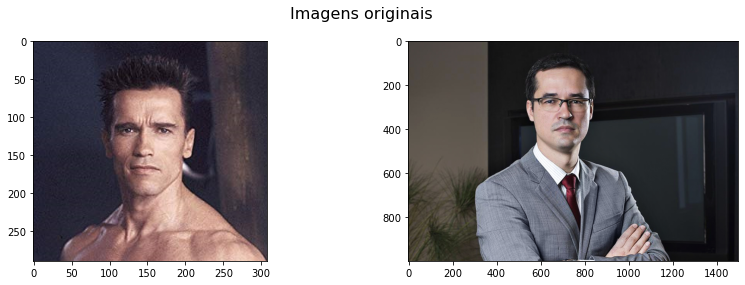

 
### Análise das faces utilizando DeepFace ⚡️

<hr>

| <h2>Característica 🖲</h2> |  <h2>[ Imagem 1 📸]</h2> | <h2>[ Imagem 2 📷]</h2> |
|--------------------|----------|:--------:|
| <h3>Gênero</h3>  | <h3>♂</h3> | <h3>♂ </h3>    |
| <h3>Idades</h3> |   <h4>25  </h4>    |    <h4> 30 </h4>    |
| <h3>Etnia</h3>             |  <h4>white </h4>       |       <h4> asian  </h4>|
| <h3>Emoção</h3>           | <h4>  neutral  </h4>     |  <h4>  neutral   </h4>   |



In [159]:
show_multiple_images([img_1_original, img_2_original], 1, 2, 'Imagens originais')
generate_statistics_markdown(img_1_stats, img_2_stats)

#### Criando uma matriz do tamanho da primeira imagem em preto-e-branco

#### Pegar o tamanho e canais da segunda imagem

#### Criar uma matriz com as dimensões e canais da segunda imagem 

In [9]:
img_1_canvas = np.zeros_like(img_1_grayscale)
height, width, number_of_channels = img_2.shape
img_2_canvas = np.zeros((height, width, number_of_channels), np.uint8)

#### Achar as faces nas imagens, o que que retornará um array contendo as diagonais da face ( canto superior esquerdo e inferior direito )

In [10]:
faces_1, faces_2 = frontal_face_detector(img_1_grayscale), frontal_face_detector(img_2_grayscale)

#### Atravessar as faces da primeira imagem e detectar os pontos principais delas
#### Pega os 68 pontos principais da face e adiciona-os a lista de pontos faciais
#### Destaca os pontos faciais principais e apresenta a imagem

In [11]:
def set_landmarks(face_landmarks, face_landmark_points, img):
    for landmark in range(68):
        x = face_landmarks.part(landmark).x
        y = face_landmarks.part(landmark).y

        face_landmark_points.append((x, y))
        cv2.putText(img, str(landmark), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (255, 255, 255), 1)
        cv2.circle(img, (x, y), 2, (0, 0, 255), -1)

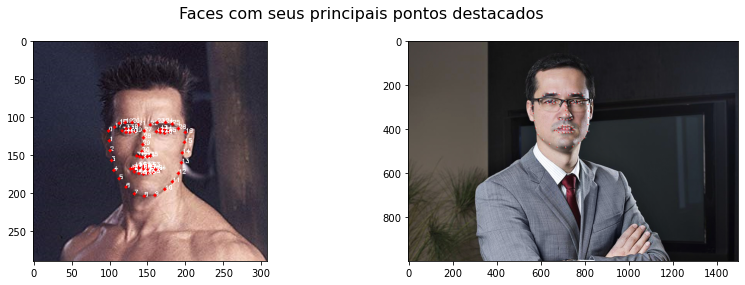

In [12]:
face_1_landmarks, face_2_landmarks = frontal_face_predictor(img_1_grayscale, faces_1[0]),\
                                        frontal_face_predictor(img_2_grayscale, faces_2[0])
face_1_landmark_points, face_2_landmark_points = [], []
img_1_with_landmarks_and_numbers, img_2_with_landmarks_and_numbers = img_1_original.copy(), img_2_original.copy()

set_landmarks(face_1_landmarks, face_1_landmark_points, img_1_with_landmarks_and_numbers)
set_landmarks(face_2_landmarks, face_2_landmark_points, img_2_with_landmarks_and_numbers)

show_multiple_images([img_1_with_landmarks_and_numbers, img_2_with_landmarks_and_numbers], 1, 2, 'Faces com seus principais pontos destacados')

#### Achar a envoltória convexa dos pontos principais da imagem, ou seja, o menor conjunto convexo que contém os pontos destacados anteriormente. Aplicando a face na máscara posteriormente

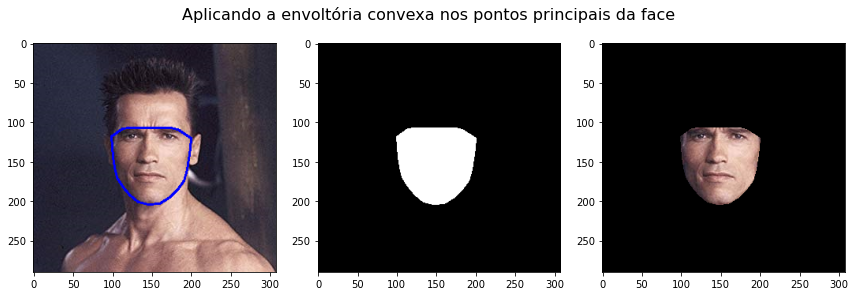

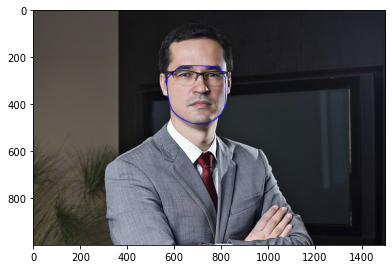

In [13]:
face_1_landmark_points_array, face_2_landmark_points_array = np.array(face_1_landmark_points, np.int32),\
                                                                np.array(face_2_landmark_points, np.int32)
face_1_convex_hull, face_2_convex_hull = cv2.convexHull(face_1_landmark_points_array),\
                                            cv2.convexHull(face_2_landmark_points_array)

cv2.polylines(img_1, [face_1_convex_hull], True, (255, 0, 0), 2)
cv2.polylines(img_2, [face_2_convex_hull], True, (255, 0, 0), 2)

cv2.fillConvexPoly(img_1_canvas, face_1_convex_hull, 255), cv2.fillConvexPoly(img_2_canvas, face_2_convex_hull, 255)
face_1_trimmed = cv2.bitwise_and(img_1_original, img_1_original, mask=img_1_canvas)
show_multiple_images([img_1, img_1_canvas, face_1_trimmed], 1, 3, 'Aplicando a envoltória convexa nos pontos principais da face')
show_image(img_2)

#### Utilizar a Triangulação de Delaunay para a criação de uma malha contígua de pontos triangulares que não se entrelaçam

#### Um retângulo será encontrado ao redor dos pontos da envoltória convexa da imagem, criação de uma subdivisão de Delaunay, incluindo todos os pontos do retângulo e retornar a lista de triangulos posteriormente, com 6 itens por vetor de triangulo (x, y) dos 3 pontos

#### Ao invés de trabalhar com os triângulos, pegaremos os índices do principais pontos faciais do i      indivíduo, sendo assim, agora teremos o índice dos pontos principais armazenados facilitando o         processo de swap com a outra imagem. Basicamente transformando os triângulos de um sistema de         coordenadas (x, y) para o formato de pontos faciais principais

In [14]:
bounding_rectangle = cv2.boundingRect(face_1_convex_hull)
subdivision = cv2.Subdiv2D(bounding_rectangle)
subdivision.insert(face_1_landmark_points)
triangles_vector = subdivision.getTriangleList()
triangles_array = np.array(triangles_vector, dtype=np.int32)
triangles_vertices = [] 

In [15]:
def fetch_index_from_numpy_array(np_array):
    for n in np_array[0]: return n
    
def get_vertex_as_landmarrk_point(landmark_points_array, vertex):
    vertex = np.where((face_1_landmark_points_array == vertex).all(axis=1))
    vertex = fetch_index_from_numpy_array(vertex)
    return vertex

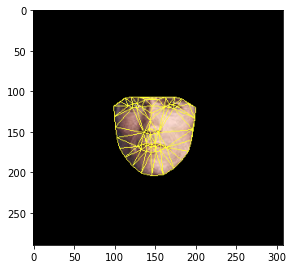

In [16]:
for triangle in triangles_array:
    vertex_1 = (triangle[0], triangle[1])
    vertex_2 = (triangle[2], triangle[3])
    vertex_3 = (triangle[4], triangle[5])
    line_color = (51,255,255)
    cv2.line(face_1_trimmed, vertex_1, vertex_2, line_color, 1)
    cv2.line(face_1_trimmed, vertex_2, vertex_3, line_color, 1) 
    cv2.line(face_1_trimmed, vertex_3, vertex_1, line_color,1)
    
    vertex_1 = get_vertex_as_landmarrk_point(face_1_landmark_points_array, vertex_1)
    vertex_2 = get_vertex_as_landmarrk_point(face_1_landmark_points_array, vertex_2)
    vertex_3 = get_vertex_as_landmarrk_point(face_1_landmark_points_array, vertex_3)
    
    triangle = [vertex_1, vertex_2, vertex_3]
    triangles_vertices.append(triangle)
    
show_image(face_1_trimmed)

#### Cortar os triangulos demarcados de ambas as fotos
- Capturar as coordenadas dos triângulos
- Destacar um retângulo ao redor desse triângulo
- Cortar o retângulo para depois colá-lo na segunda imagem
- Remover os pontos do retângulo 
- Para determinar os triângulos para a segunda foto os mesmos índices dos pontos faciais principais são utilizados (da lista de triâgulos da primeira foto, contendo os índices dos pontos faciais princiais), e também haverá um retângulo ao redor do triângulo da segunda imagem. Para cada triângulo demarcado na segunda imagem uma nova máscara é criada com os pontos do triangulo relativos a segunda imagem
- Ajustar a máscara da imagem 1 para caber na máscara recortada da imagem 2 utilizando transformação afim
- Reconstrução da segunda imagem utilizando os triângulos após a transformação a fim de manter as proporções da face original
- Por fim, recorta-se um setor da nova imagem 2 (será utilizado um canvas preto a ser preenchido), transforma-o para preto-e-branco e retira-se as secções brancas do triângulo para melhorar na interpolação destes. Utilizando esta máscara que filtra os pontos brancos, o triângulo recortado relativo a segunda imagem é adicionado ao canvas. Para cada triângulo extraído da imagem 1

In [17]:
def extract_triangle(face_landmark_points, triangle_index_points):
    point_1 = face_landmark_points[triangle_index_points[0]]
    point_2 = face_landmark_points[triangle_index_points[1]]
    point_3 = face_landmark_points[triangle_index_points[2]]
    triangle = np.array([point_1, point_2, point_3], np.int32)
    
    return point_1, point_2, point_3, triangle

def get_rectangle(triangle):
    rectangle = cv2.boundingRect(triangle)
    (x, y, w, h) = rectangle
    return rectangle, (x, y, w, h)

def draw_rectangle(point_1, point_2, point_3, rectangle_visualization, rectangle, crop, i, txt):
    (x, y, w, h) = rectangle
    cv2.line(rectangle_visualization, point_1, point_2, (200, 100, 0), 1)
    cv2.line(rectangle_visualization, point_2, point_3, (200, 100, 0), 1)
    cv2.line(rectangle_visualization, point_3, point_1, (200, 100, 0), 1)
    cv2.rectangle(rectangle_visualization, (x, y), (x + w, y + h), (0, 0, 255), 1)
    show_multiple_images([rectangle_visualization, crop], 1, 2, txt)
    
def extract_triangle_points(point_1, point_2, point_3, x, y):
    return np.array([[point_1[0] - x, point_1[1] - y],
                     [point_2[0] - x, point_2[1] - y],
                     [point_3[0] - x, point_3[1] - y]], np.int32)

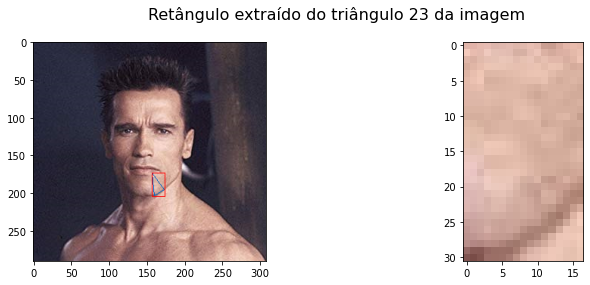

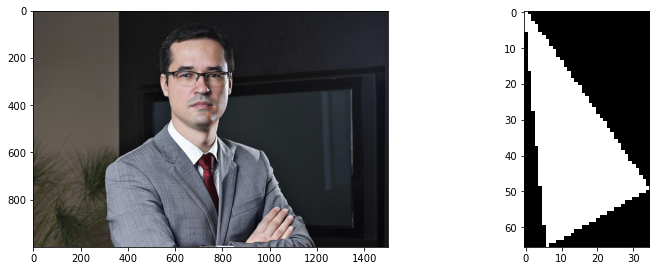

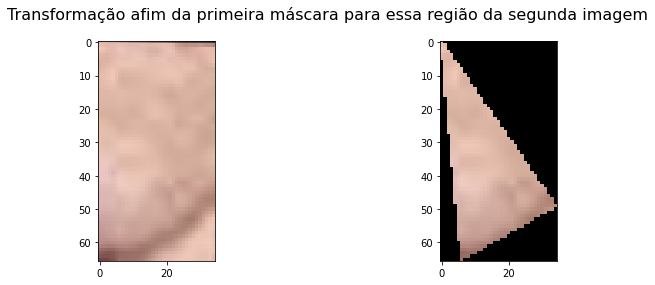

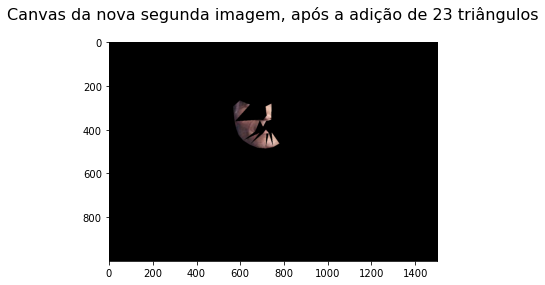

In [18]:
rectangle_visualization_1, rectangle_visualization_2  = img_1_original.copy(), img_2_original.copy()
img_2_canvas = np.zeros((height, width, number_of_channels), np.uint8)
for i, triangle_index_points in enumerate(triangles_vertices):
    triangle_1_point_1, triangle_1_point_2, triangle_1_point_3, triangle_1 = extract_triangle(face_1_landmark_points, triangle_index_points)
    rectangle_1, (x, y, w, h) = get_rectangle(triangle_1)
    
    cropped_rectangle_1 = img_1_original[y: y + h, x: x + w]
    
    triangle_1_points = extract_triangle_points(triangle_1_point_1, triangle_1_point_2, triangle_1_point_3, x, y)
        
    triangle_2_point_1, triangle_2_point_2, triangle_2_point_3, triangle_2 = extract_triangle(face_2_landmark_points, triangle_index_points)  
    rectangle_2, (x, y, w, h) = get_rectangle(triangle_2)
    
    cropped_rectangle_2_mask = np.zeros((h, w), np.uint8)
    
    triangle_2_points = extract_triangle_points(triangle_2_point_1, triangle_2_point_2, triangle_2_point_3, x, y)    
    cv2.fillConvexPoly(cropped_rectangle_2_mask, triangle_2_points, 255)
    
    triangle_1_points, triangle_2_points = np.float32(triangle_1_points), np.float32(triangle_2_points)
    transformation_matrix = cv2.getAffineTransform(triangle_1_points, triangle_2_points)
    warped_rectangle = cv2.warpAffine(cropped_rectangle_1, transformation_matrix, (w, h))
    warped_triangle = cv2.bitwise_and(warped_rectangle, warped_rectangle, mask=cropped_rectangle_2_mask) 
    
    face_2_canvas_area = img_2_canvas[y: y + h, x: x + w]
    face_2_canvas_area_grayscale = cv2.cvtColor(face_2_canvas_area, cv2.COLOR_BGR2GRAY)
    _, mask_created_triangle = cv2.threshold(face_2_canvas_area_grayscale, 1, 255, cv2.THRESH_BINARY_INV)

    wraped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_created_triangle)

    face_2_canvas_area = cv2.add(face_2_canvas_area, wraped_triangle)
    img_2_canvas[y: y + h, x: x + w] = face_2_canvas_area
    if i == 23:
        draw_rectangle(triangle_1_point_1, triangle_1_point_2, triangle_1_point_3,\
                        rectangle_visualization_1, rectangle_1, cropped_rectangle_1, i, 'Retângulo extraído do triângulo {0} da imagem'.format(i))
        draw_rectangle(triangle_2_point_1, triangle_2_point_2, triangle_2_point_3,\
                        rectangle_visualization_2, rectangle_2, cropped_rectangle_2_mask, i, '')
        show_multiple_images([warped_rectangle, warped_triangle], 1, 2, 'Transformação afim da primeira máscara para essa região da segunda imagem')
        show_image(img_2_canvas, 'Canvas da nova segunda imagem, após a adição de {0} triângulos'.format(i))

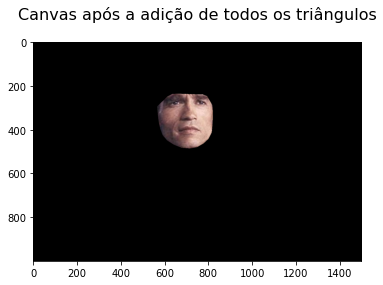

In [19]:
show_image(img_2_canvas, 'Canvas após a adição de todos os triângulos')

### Criação de um novo canvas para guardar a face após o swap, esse canvas terá o tamanho da segunda imagem. Depois há o preenchimento da envoltória convexa com esses pontos ( envolvendo a face da segunda image ), após isso a máscara é adicionada a imagem original e por fim, ela é preenchida pela face pós-swap

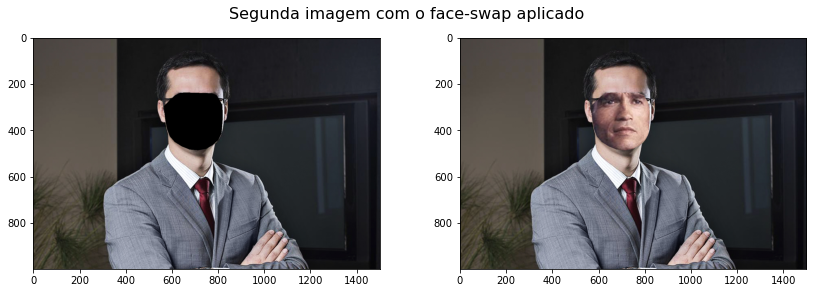

In [20]:
img_2_face_mask_canvas = np.zeros_like(img_2_grayscale)
img_2_face_mask = cv2.fillConvexPoly(img_2_face_mask_canvas, face_2_convex_hull, 255)
img_2_face_mask_canvas = cv2.bitwise_not(img_2_face_mask)
img_2_without_face = cv2.bitwise_and(img_2_original, img_2_original, mask=img_2_face_mask_canvas)
img_2_with_face = cv2.add(img_2_without_face, img_2_canvas)
show_multiple_images([img_2_without_face, img_2_with_face], 1, 2, 'Segunda imagem com o face-swap aplicado')

#### Utilizar o método Seamless Clone deixando a nova face mais natural e ajustada a imagem original, para tanto, faz-se necessário encontrar o ponto central da envoltória convexa da imagem, tornando-o mais natural a partir deste ponto,  outrossim, utilizará a imagem original, visando capturar a iluminação e cores dela

In [164]:
(x, y, w, h) = cv2.boundingRect(face_2_convex_hull)
face_2_center_point = (int((x+x+w)/2), int((y+y+h)/2))
img_seamless_cloned = cv2.seamlessClone(img_2_with_face, img_2_original, img_2_face_mask, face_2_center_point, cv2.NORMAL_CLONE)
img_swapped_stats = DeepFace.analyze(img_seamless_cloned, actions = ['age', 'gender', 'race', 'emotion'])

Action: emotion: 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]


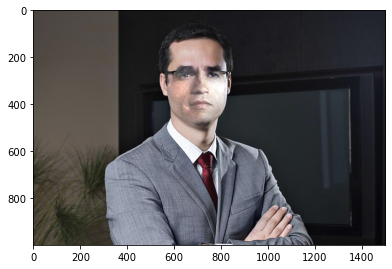

 
### Análise da face após o swap utilizando DeepFace 🔎

<hr>

| <h2>Característica 🖲</h2> |  <h2>[ Imagem após swap 📸]</h2> | 
|--------------------|----------|
| <h3>Gênero</h3> | <h3>♂</h3> |
| <h3>Idade</h3> |   <h4>23  </h4>    | 
| <h3>Etnia</h3>  |  <h4>latino hispanic </h4>       |  
| <h3>Emoção</h3> | <h4>  happy  </h4>     | 



In [169]:
show_image(img_seamless_cloned)
generate_statistics_markdown(img_swapped_stats)